In [6]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "data\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="binary"
)

val = datagen.flow_from_directory(
    "data\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation",
    class_mode="binary"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "data\\test",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation="sigmoid"))

    model.summary()

    return model

In [8]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="binary_crossentropy",metrics=["acc"])
history = model12.fit_generator(
    train,
    epochs=50,
    validation_data=val
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 74, 74, 128)      512       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 128)       147584    
                                                                 
 batch_normalization_13 (Bat  (None, 74, 74, 128)     

C:\Users\MTG\AppData\Local\Temp\ipykernel_908\3730779374.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model12.fit_generator(


Epoch 1/50
528/528 [==============================] - 77s 136ms/step - loss: 0.8650 - acc: 0.6137 - val_loss: 0.8138 - val_acc: 0.6300
Epoch 2/50
528/528 [==============================] - 35s 66ms/step - loss: 0.6232 - acc: 0.7204 - val_loss: 2.1857 - val_acc: 0.6148
Epoch 3/50
528/528 [==============================] - 35s 66ms/step - loss: 0.6073 - acc: 0.7114 - val_loss: 0.6506 - val_acc: 0.6376
Epoch 4/50
528/528 [==============================] - 35s 66ms/step - loss: 0.5520 - acc: 0.7427 - val_loss: 0.7624 - val_acc: 0.5996
Epoch 5/50
528/528 [==============================] - 36s 68ms/step - loss: 0.5473 - acc: 0.7384 - val_loss: 0.9686 - val_acc: 0.5920
Epoch 6/50
528/528 [==============================] - 35s 66ms/step - loss: 0.5282 - acc: 0.7460 - val_loss: 1.3267 - val_acc: 0.5598
Epoch 7/50
528/528 [==============================] - 45s 86ms/step - loss: 0.5349 - acc: 0.7445 - val_loss: 0.7772 - val_acc: 0.6186
Epoch 8/50
528/528 [==============================] - 112s 21

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model12.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

C:\Users\MTG\AppData\Local\Temp\ipykernel_908\3413403080.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model12.predict_generator(test)


660

In [10]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)
cm

array([[360,   0],
       [300,   0]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

      benign     0.5455    1.0000    0.7059       360
   malignant     0.0000    0.0000    0.0000       300

    accuracy                         0.5455       660
   macro avg     0.2727    0.5000    0.3529       660
weighted avg     0.2975    0.5455    0.3850       660



c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

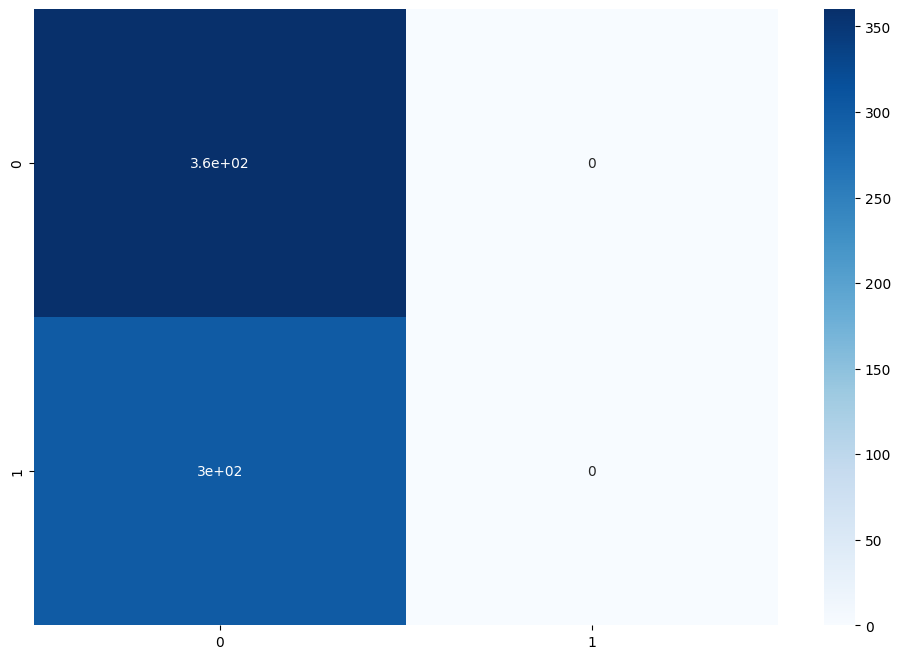

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()